<a href="https://colab.research.google.com/github/joosk3R/jskRprac/blob/main/dacon_crime_category_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


^C
^C


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pathlib import Path
import matplotlib.patches as mpatches

font_path = Path("/content/drive/MyDrive/NanumGothic.otf")
fontprop = fm.FontProperties(fname=font_path, size=10)

In [ ]:
pip install mljar-supervised


In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor
import pandas as pd
import random
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from supervised.automl import AutoML

In [ ]:

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(1004) # Seed 고정

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/open (6)/train.csv")
test = pd.read_csv("/content/drive/MyDrive/open (6)/test.csv")

In [ ]:
train.describe()

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
train.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


## EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

In [ ]:
train['범죄발생지'].value_counts()

주거지      36077
차도       25879
인도        6437
편의점       4835
주차장       3262
식당        1806
백화점       1493
주유소       1324
공원         736
학교         728
약국         653
호텔/모텔      591
병원         453
은행         132
Name: 범죄발생지, dtype: int64

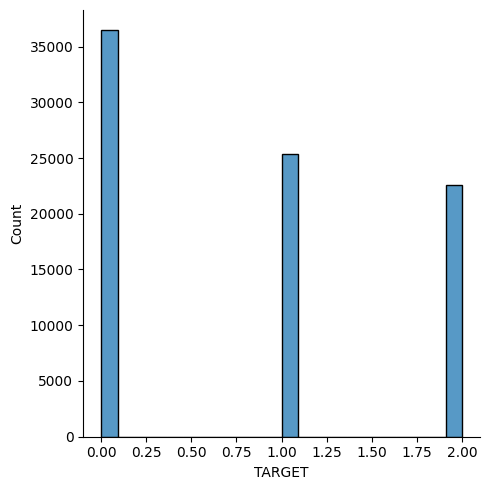

In [ ]:
sns.displot(train['TARGET']) #불균형은 크게 보이지 않는 것으로 확인

In [ ]:
except_target = train.drop('TARGET', axis = 1)
except_target.hist(figsize = (12,12))
plt.show()

In [ ]:
except_target

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000000,0.0,0.00,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000000,0.0,0.00,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375000,0.0,0.00,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000000,0.0,0.00,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84401,TRAIN_84401,4,일요일,7,336,11.0,3.808190,99.111111,0.0,0.00,165.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
84402,TRAIN_84402,8,목요일,12,2149,38.0,1.458490,0.000000,0.0,0.00,200.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,차도
84403,TRAIN_84403,7,일요일,6,29,46.0,2.944913,105.888889,0.0,0.00,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
84404,TRAIN_84404,1,화요일,11,536,25.0,0.493679,2.285714,8.6,10.75,330.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,주거지


In [ ]:
sns.countplot(x = '시간', hue = 'TARGET', data = train)
plt.show()

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(y = train['사건발생거리'], ax = axes[0][0])
sns.boxplot(y = train['강수량(mm)'], ax = axes[0][1])

sns.boxplot(y = train['강설량(mm)'], ax = axes[1][0])
sns.boxplot(y = train['적설량(cm)'], ax = axes[1][1])

plt.show()

In [ ]:
train.drop("")

##전처리


In [ ]:
train_pre["소관지역"]

0         8.0
1        13.0
2        47.0
3        53.0
4        41.0
         ... 
84401    11.0
84402    38.0
84403    46.0
84404    25.0
84405    13.0
Name: 소관지역, Length: 84406, dtype: float64

In [ ]:
train_y = train["TARGET"]
train_y

0        2
1        0
2        1
3        1
4        2
        ..
84401    1
84402    0
84403    0
84404    1
84405    0
Name: TARGET, Length: 84406, dtype: int64

In [ ]:
automl = AutoML(mode='Compete', eval_metric='accuracy', random_state=42)
automl.fit(train_pre, train_y)
pred = automl.predict(test_pre)



In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/open (6)/sample_submission.csv")
submission.iloc[:, 1] = pred
submission.to_csv("/content/drive/MyDrive/open (6)/automl_fixed.csv", index=False)

<ipython-input-19-1e5d47f1cda0>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


####feature 엔지니어링이 별 의미가 없음
원상태로 autogluon 사용

In [ ]:
!pip install autogluon

In [ ]:
import os
import pandas as pd
import random
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
import autogluon.core as ag

import warnings
warnings.filterwarnings("ignore")

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(69)

train_data = pd.read_csv('/content/drive/MyDrive/open (6)/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/open (6)/test.csv')

In [ ]:
train_pre = pd.concat([train,train_dum,train_dum1,train_dum2,train_dum3],axis = 1)
test_pre = pd.concat([test,test_dum,test_dum1,test_dum2,test_dum3],axis = 1)
T = train_pre["TARGET"]
train_pre.drop(['요일','시간','범죄발생지','월',"TARGET"],axis = 1, inplace = True)
test_pre.drop(['요일','시간','범죄발생지','월'],axis = 1, inplace = True)

In [ ]:
T = train_pre["TARGET"]

0        2
1        0
2        1
3        1
4        2
        ..
84401    1
84402    0
84403    0
84404    1
84405    0
Name: TARGET, Length: 84406, dtype: int64

In [ ]:
test_pre

In [ ]:
train_pre.columns

Index([     'ID',   '소관경찰서',    '소관지역',  '사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)',      '풍향',      '안개',    '짙은안개',      '번개',    '진눈깨비',
            '서리',   '연기/연무',     '눈날림',      '공원',     '백화점',      '병원',
            '식당',      '약국',      '은행',      '인도',     '주거지',     '주유소',
           '주차장',      '차도',     '편의점',      '학교',   '호텔/모텔',     '금요일',
           '목요일',     '수요일',     '월요일',     '일요일',     '토요일',     '화요일',
               1,         2,         3,         4,         5,         6,
               7,         8,         9,        10,        11,        12,
               1,         2,         3,         4,         5,         6,
               7,         8,         9,        10,        11,        12],
      dtype='object')

In [ ]:
test_pre.columns

Index([     'ID',   '소관경찰서',    '소관지역',  '사건발생거리', '강수량(mm)', '강설량(mm)',
       '적설량(cm)',      '풍향',      '안개',    '짙은안개',      '번개',    '진눈깨비',
            '서리',   '연기/연무',     '눈날림',      '공원',     '백화점',      '병원',
            '식당',      '약국',      '은행',      '인도',     '주거지',     '주유소',
           '주차장',      '차도',     '편의점',      '학교',   '호텔/모텔',     '금요일',
           '목요일',     '수요일',     '월요일',     '일요일',     '토요일',     '화요일',
               1,         2,         3,         4,         5,         6,
               7,         8,         9,        10,        11,        12,
               1,         2,         3,         4,         5,         6,
               7,         8,         9,        10,        11,        12],
      dtype='object')

In [ ]:
train_pre1= pd.concat([train_pre,T],axis=1)

In [ ]:
train_dum_re.columns

Index(['ID', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)', '적설량(cm)', '풍향',
       '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림', 'TARGET', '범죄발생지_공원',
       '범죄발생지_백화점', '범죄발생지_병원', '범죄발생지_식당', '범죄발생지_약국', '범죄발생지_은행', '범죄발생지_인도',
       '범죄발생지_주거지', '범죄발생지_주유소', '범죄발생지_주차장', '범죄발생지_차도', '범죄발생지_편의점',
       '범죄발생지_학교', '범죄발생지_호텔/모텔', '요일_금요일', '요일_목요일', '요일_수요일', '요일_월요일',
       '요일_일요일', '요일_토요일', '요일_화요일', '시간_1', '시간_2', '시간_3', '시간_4', '시간_5',
       '시간_6', '시간_7', '시간_8', '시간_9', '시간_10', '시간_11', '시간_12', '월_1', '월_2',
       '월_3', '월_4', '월_5', '월_6', '월_7', '월_8', '월_9', '월_10', '월_11',
       '월_12'],
      dtype='object')

#더미변수 생성


In [ ]:
train_dum_re = pd.get_dummies(train, columns = ['범죄발생지','요일','시간','월'])
test_dum_re = pd.get_dummies(test, columns = ['범죄발생지','요일','시간','월'])

In [ ]:
train_dum_re.columns

Index(['ID', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '강설량(mm)', '적설량(cm)', '풍향',
       '안개', '짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림', 'TARGET', '범죄발생지_공원',
       '범죄발생지_백화점', '범죄발생지_병원', '범죄발생지_식당', '범죄발생지_약국', '범죄발생지_은행', '범죄발생지_인도',
       '범죄발생지_주거지', '범죄발생지_주유소', '범죄발생지_주차장', '범죄발생지_차도', '범죄발생지_편의점',
       '범죄발생지_학교', '범죄발생지_호텔/모텔', '요일_금요일', '요일_목요일', '요일_수요일', '요일_월요일',
       '요일_일요일', '요일_토요일', '요일_화요일', '시간_1', '시간_2', '시간_3', '시간_4', '시간_5',
       '시간_6', '시간_7', '시간_8', '시간_9', '시간_10', '시간_11', '시간_12', '월_1', '월_2',
       '월_3', '월_4', '월_5', '월_6', '월_7', '월_8', '월_9', '월_10', '월_11',
       '월_12'],
      dtype='object')

In [ ]:
train_dum_re.drop(['짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림','강설량(mm)', '적설량(cm)'],axis = 1, inplace = True)
test_dum_re.drop(['짙은안개', '번개', '진눈깨비', '서리', '연기/연무', '눈날림','강설량(mm)', '적설량(cm)'],axis = 1, inplace = True)

In [ ]:
train_dum_re.columns

Index(['ID', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '풍향', '안개', 'TARGET',
       '범죄발생지_공원', '범죄발생지_백화점', '범죄발생지_병원', '범죄발생지_식당', '범죄발생지_약국', '범죄발생지_은행',
       '범죄발생지_인도', '범죄발생지_주거지', '범죄발생지_주유소', '범죄발생지_주차장', '범죄발생지_차도',
       '범죄발생지_편의점', '범죄발생지_학교', '범죄발생지_호텔/모텔', '요일_금요일', '요일_목요일', '요일_수요일',
       '요일_월요일', '요일_일요일', '요일_토요일', '요일_화요일', '시간_1', '시간_2', '시간_3', '시간_4',
       '시간_5', '시간_6', '시간_7', '시간_8', '시간_9', '시간_10', '시간_11', '시간_12',
       '월_1', '월_2', '월_3', '월_4', '월_5', '월_6', '월_7', '월_8', '월_9', '월_10',
       '월_11', '월_12'],
      dtype='object')

In [ ]:
train_data = TabularDataset(train_dum_re)
test_data = TabularDataset(test_dum_re)

train_data.drop('ID',axis = 1, inplace = True)
test_data.drop('ID',axis = 1, inplace = True)

label = "TARGET"
eval_metric = 'f1_macro'
time_limit = 3600*3

In [ ]:
train_data.columns

Index(['소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '풍향', '안개', '범죄발생지_공원',
       '범죄발생지_백화점', '범죄발생지_병원', '범죄발생지_식당', '범죄발생지_약국', '범죄발생지_은행', '범죄발생지_인도',
       '범죄발생지_주거지', '범죄발생지_주유소', '범죄발생지_주차장', '범죄발생지_차도', '범죄발생지_편의점',
       '범죄발생지_학교', '범죄발생지_호텔/모텔', '요일_금요일', '요일_목요일', '요일_수요일', '요일_월요일',
       '요일_일요일', '요일_토요일', '요일_화요일', '시간_1', '시간_2', '시간_3', '시간_4', '시간_5',
       '시간_6', '시간_7', '시간_8', '시간_9', '시간_10', '시간_11', '시간_12', '월_1', '월_2',
       '월_3', '월_4', '월_5', '월_6', '월_7', '월_8', '월_9', '월_10', '월_11',
       '월_12'],
      dtype='object')

In [ ]:
test_data.columns

Index(['소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '풍향', '안개', '범죄발생지_공원',
       '범죄발생지_백화점', '범죄발생지_병원', '범죄발생지_식당', '범죄발생지_약국', '범죄발생지_은행', '범죄발생지_인도',
       '범죄발생지_주거지', '범죄발생지_주유소', '범죄발생지_주차장', '범죄발생지_차도', '범죄발생지_편의점',
       '범죄발생지_학교', '범죄발생지_호텔/모텔', '요일_금요일', '요일_목요일', '요일_수요일', '요일_월요일',
       '요일_일요일', '요일_토요일', '요일_화요일', '시간_1', '시간_2', '시간_3', '시간_4', '시간_5',
       '시간_6', '시간_7', '시간_8', '시간_9', '시간_10', '시간_11', '시간_12', '월_1', '월_2',
       '월_3', '월_4', '월_5', '월_6', '월_7', '월_8', '월_9', '월_10', '월_11',
       '월_12'],
      dtype='object')

In [ ]:
#excluded_model_types = ['CAT']
predictor = TabularPredictor(
    label=label, problem_type='multiclass', eval_metric=eval_metric
).fit(train_data,
      num_stack_levels=3,
      presets='best_quality',
      time_limit=time_limit)

No path specified. Models will be saved in: "AutogluonModels/ag-20230519_022731/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 10800s
AutoGluon will save models to "AutogluonModels/ag-20230519_022731/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    84406
Train Data Columns: 51
Label Column: TARGET
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11597.34 MB
	Train Data (Original)  Memory Usage: 7.85 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting As

In [ ]:
print(predictor.leaderboard(silent = True))


                      model  score_val  pred_time_val     fit_time  \
0       WeightedEnsemble_L4   0.530072     180.126822  8385.944730   
1    NeuralNetFastAI_BAG_L3   0.529821     145.806682  7579.992799   
2    NeuralNetFastAI_BAG_L4   0.528711     200.829957  9860.524326   
3       WeightedEnsemble_L5   0.528711     200.865327  9877.854712   
4       WeightedEnsemble_L3   0.528221     127.749847  6291.056637   
5    NeuralNetFastAI_BAG_L2   0.527131      79.559971  4558.761267   
6            XGBoost_BAG_L3   0.526646     144.086526  6668.444990   
7         LightGBMXT_BAG_L3   0.526480     146.466810  6646.414871   
8         LightGBMXT_BAG_L4   0.526441     201.750972  9132.292989   
9         LightGBMXT_BAG_L2   0.526200      81.829112  3624.272198   
10          CatBoost_BAG_L3   0.526032     143.119767  6816.670081   
11          LightGBM_BAG_L4   0.525937     200.758779  9136.641694   
12          LightGBM_BAG_L3   0.525737     146.401014  6649.211895   
13          LightGBM

In [ ]:
predictor.feature_importance(train_data)
model_to_use = predictor.get_model_best()
model_pred = predictor.predict(test_data, model=model_to_use)

submission = pd.read_csv('/content/drive/MyDrive/open (6)/sample_submission.csv')

submission["TARGET"] = model_pred
submission.to_csv('/content/drive/MyDrive/open (6)/Gluon_submission1.csv', index=False, encoding="utf-8")

Computing feature importance via permutation shuffling for 51 features using 5000 rows with 5 shuffle sets...
	23546.14s	= Expected runtime (4709.23s per shuffle set)
	5889.94s	= Actual runtime (Completed 5 of 5 shuffle sets)


##파이캐럿도 사용해서 어떤게 제일 좋은지 지표로 확인


In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [ ]:
train_dum_re.columns

Index(['ID', '소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '풍향', '안개', 'TARGET',
       '범죄발생지_공원', '범죄발생지_백화점', '범죄발생지_병원', '범죄발생지_식당', '범죄발생지_약국', '범죄발생지_은행',
       '범죄발생지_인도', '범죄발생지_주거지', '범죄발생지_주유소', '범죄발생지_주차장', '범죄발생지_차도',
       '범죄발생지_편의점', '범죄발생지_학교', '범죄발생지_호텔/모텔', '요일_금요일', '요일_목요일', '요일_수요일',
       '요일_월요일', '요일_일요일', '요일_토요일', '요일_화요일', '시간_1', '시간_2', '시간_3', '시간_4',
       '시간_5', '시간_6', '시간_7', '시간_8', '시간_9', '시간_10', '시간_11', '시간_12',
       '월_1', '월_2', '월_3', '월_4', '월_5', '월_6', '월_7', '월_8', '월_9', '월_10',
       '월_11', '월_12'],
      dtype='object')

In [ ]:
x_train = train_dum_re.drop('ID', axis = 1)
# y_train = train['TARGET']

x_test = test_dum_re.drop('ID', axis = 1)


In [ ]:
x_train.columns

Index(['소관경찰서', '소관지역', '사건발생거리', '강수량(mm)', '풍향', '안개', 'TARGET', '범죄발생지_공원',
       '범죄발생지_백화점', '범죄발생지_병원', '범죄발생지_식당', '범죄발생지_약국', '범죄발생지_은행', '범죄발생지_인도',
       '범죄발생지_주거지', '범죄발생지_주유소', '범죄발생지_주차장', '범죄발생지_차도', '범죄발생지_편의점',
       '범죄발생지_학교', '범죄발생지_호텔/모텔', '요일_금요일', '요일_목요일', '요일_수요일', '요일_월요일',
       '요일_일요일', '요일_토요일', '요일_화요일', '시간_1', '시간_2', '시간_3', '시간_4', '시간_5',
       '시간_6', '시간_7', '시간_8', '시간_9', '시간_10', '시간_11', '시간_12', '월_1', '월_2',
       '월_3', '월_4', '월_5', '월_6', '월_7', '월_8', '월_9', '월_10', '월_11',
       '월_12'],
      dtype='object')

In [ ]:
!pip install pycaret


In [ ]:
from pycaret import classification
classification.setup(data=x_train ,target='TARGET',
                 remove_outliers=True)

,Description,Value
0,Session id,1974
1,Target,TARGET
2,Target type,Multiclass
3,Original data shape,"(84406, 52)"
4,Transformed data shape,"(81451, 52)"
5,Transformed train set shape,"(56129, 52)"
6,Transformed test set shape,"(25322, 52)"
7,Numeric features,51
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = classification.compare_models(n_select=5,fold=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5491,0.6990,0.5491,0.5458,0.5392,0.2888,0.2943,2.3060
gbc,Gradient Boosting Classifier,0.5481,0.6981,0.5481,0.5462,0.5373,0.2864,0.2927,30.8080
catboost,CatBoost Classifier,0.5444,0.6931,0.5444,0.5398,0.5343,0.2813,0.2865,30.8100
xgboost,Extreme Gradient Boosting,0.5438,0.6940,0.5438,0.5396,0.5335,0.2802,0.2856,39.8540
ada,Ada Boost Classifier,0.5427,0.6896,0.5427,0.5410,0.5336,0.2812,0.2862,3.1940
ridge,Ridge Classifier,0.5314,0.0000,0.5314,0.5415,0.5156,0.2615,0.2708,0.4780
lda,Linear Discriminant Analysis,0.5300,0.6771,0.5300,0.5427,0.5135,0.2599,0.2697,0.7560
lr,Logistic Regression,0.5259,0.6650,0.5259,0.5248,0.5140,0.2541,0.2600,23.4700
rf,Random Forest Classifier,0.5232,0.6752,0.5232,0.5159,0.5134,0.2495,0.2533,12.4600
et,Extra Trees Classifier,0.4867,0.6449,0.4867,0.4792,0.4803,0.1988,0.2001,14.4220


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [ ]:
probas = []
for model in best:
    probas.append(model.predict_proba(x_test))

pred = [np.argmax(i) for i in np.array(probas).mean(axis=0)]

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/open (6)/sample_submission.csv')
sub.set_index('ID',inplace=True)
sub['TARGET'] = pred
sub.to_csv('./answer.csv')

In [ ]:
import os
import random
import warnings
from sklearn.model_selection import train_test_split

import librosa
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from tqdm.auto import tqdm
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

from transformers import AutoModelForAudioClassification, Wav2Vec2FeatureExtractor

warnings.filterwarnings(action='ignore')
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

ModuleNotFoundError: ignored

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
